In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
heart_disease = pd.read_csv("heart_2020_cleaned.csv")

In [ ]:
heart_disease.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
heart_disease.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


# Let's Understand the Data by checking the unique value of each features

In [ ]:
for feature in heart_disease.columns:
    print(feature)
    print(heart_disease[feature].unique(),"\n")

HeartDisease
['No' 'Yes'] 

BMI
[16.6  20.34 26.58 ... 62.42 51.46 46.56] 

Smoking
['Yes' 'No'] 

AlcoholDrinking
['No' 'Yes'] 

Stroke
['No' 'Yes'] 

PhysicalHealth
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.] 

MentalHealth
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.] 

DiffWalking
['No' 'Yes'] 

Sex
['Female' 'Male'] 

AgeCategory
[57. 80. 67. 77. 42. 72. 62. 52. 47. 21. 37. 32. 27.] 

Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity
['Yes' 'No'] 

GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

SleepTime
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.] 

Asthma
['Yes' 'No'] 

KidneyDisease
['No' 'Yes'] 

SkinCancer
['Yes' 'No'] 



Let's calculate the mean age and make Average Age Column a continuous feature

In [ ]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
heart_disease['AgeCategory'] = heart_disease['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
heart_disease['AgeCategory'] = heart_disease['AgeCategory'].astype('float')

In [ ]:
heart_disease.shape

(319795, 18)

In [ ]:
heart_disease.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  float64
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
heart_disease.describe()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,54.355759,7.097075
std,6.356100,7.95085,7.955235,17.720429,1.436007
min,12.020000,0.00000,0.000000,21.000000,1.000000
25%,24.030000,0.00000,0.000000,42.000000,6.000000
50%,27.340000,0.00000,0.000000,57.000000,7.000000
75%,31.420000,2.00000,3.000000,67.000000,8.000000
max,94.850000,30.00000,30.000000,80.000000,24.000000


In [ ]:
heart_disease.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
heart_disease.dropna(inplace = True)

In [ ]:
heart_disease.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
heart_disease.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [ ]:
heart_disease['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
heart_disease['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

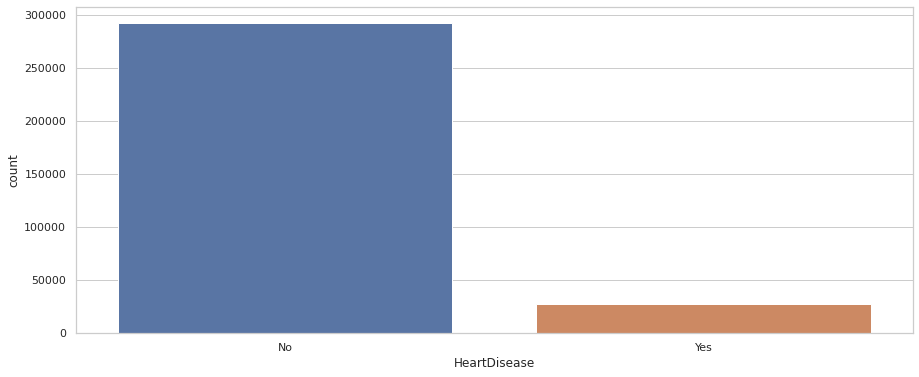

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('HeartDisease', data = heart_disease)
plt.xticks(rotation = 0)
plt.show()

# Continuous Features:
# BMI, PhysicalHealtH, MentalHealth, AgeCategory, SleepTime

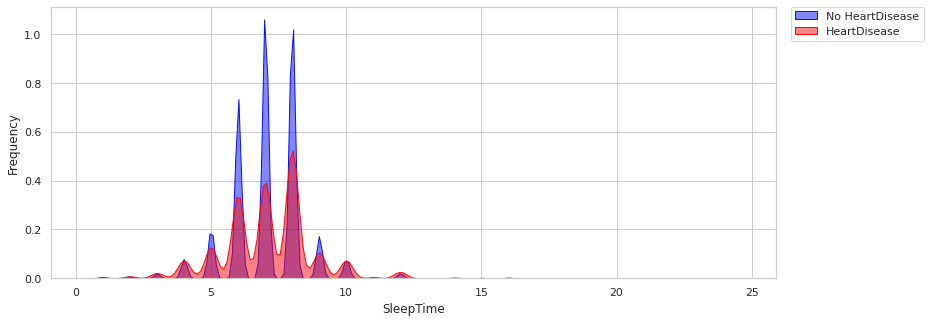

In [ ]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart_disease[heart_disease["HeartDisease"]=='No']["SleepTime"], alpha=0.5,shade = True, color="#080FF9", label="No HeartDisease", ax = ax)
sns.kdeplot(heart_disease[heart_disease["HeartDisease"]=='Yes']["SleepTime"], alpha=0.5,shade = True, color="#F90808", label="HeartDisease", ax = ax)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

Insights

*   People found to have heart disease, mostly sleep less







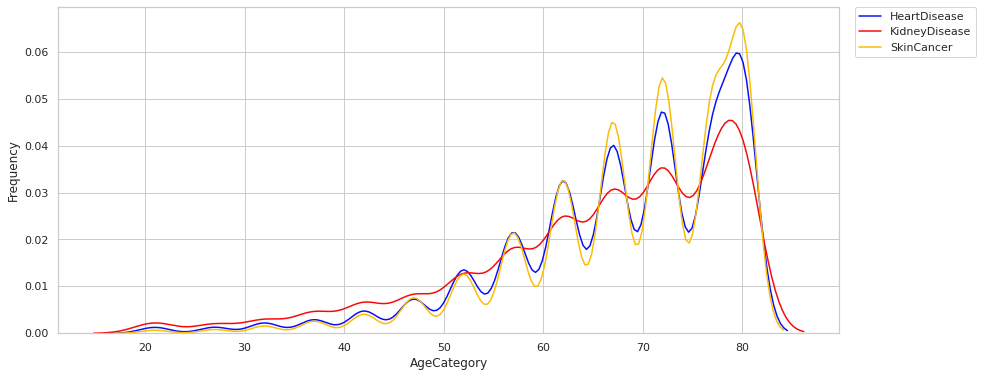

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(heart_disease[heart_disease["HeartDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#080FF9", label="HeartDisease", ax = ax)
sns.kdeplot(heart_disease[heart_disease["KidneyDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#F90808", label="KidneyDisease", ax = ax)
sns.kdeplot(heart_disease[heart_disease["SkinCancer"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#fbbc05", label="SkinCancer", ax = ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

Insights


*   People found to have heart disease, are mostly old people



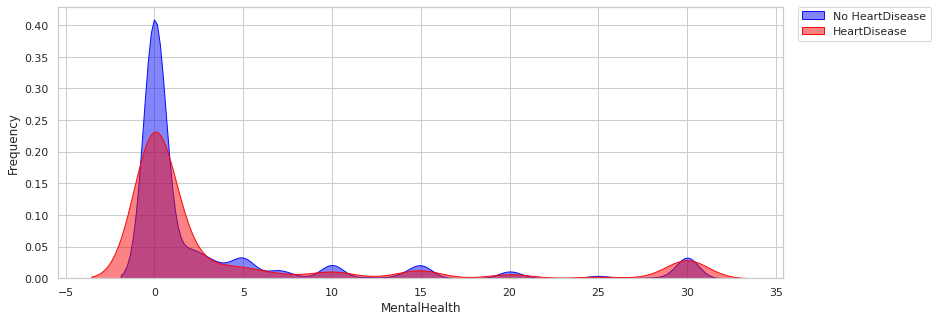

In [ ]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart_disease[heart_disease["HeartDisease"]=='No']["MentalHealth"], alpha=0.5,shade = True, color="#080FF9", label="No HeartDisease", ax = ax)
sns.kdeplot(heart_disease[heart_disease["HeartDisease"]=='Yes']["MentalHealth"], alpha=0.5,shade = True, color="#F90808", label="HeartDisease", ax = ax)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

Insights


*   People found to have heart disease, don't usually have high mental health

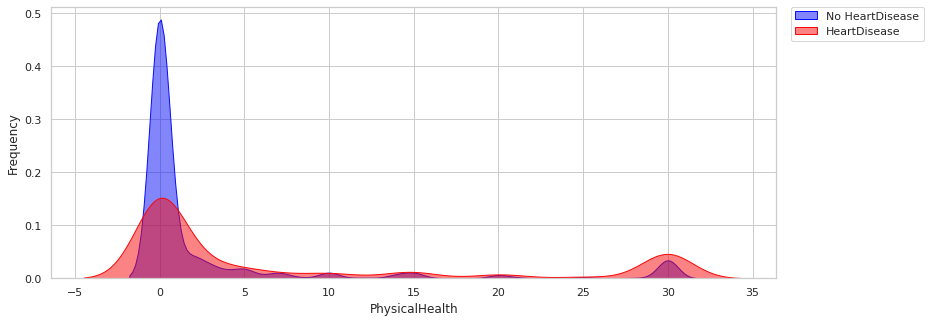

In [ ]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart_disease[heart_disease["HeartDisease"]=='No']["PhysicalHealth"], alpha=0.5,shade = True, color="#080FF9", label="No HeartDisease", ax = ax)
sns.kdeplot(heart_disease[heart_disease["HeartDisease"]=='Yes']["PhysicalHealth"], alpha=0.5,shade = True, color="#F90808", label="HeartDisease", ax = ax)
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

Insights


*   People found to have heart disease, have low Physical Health

# Categorical Features:
# HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer

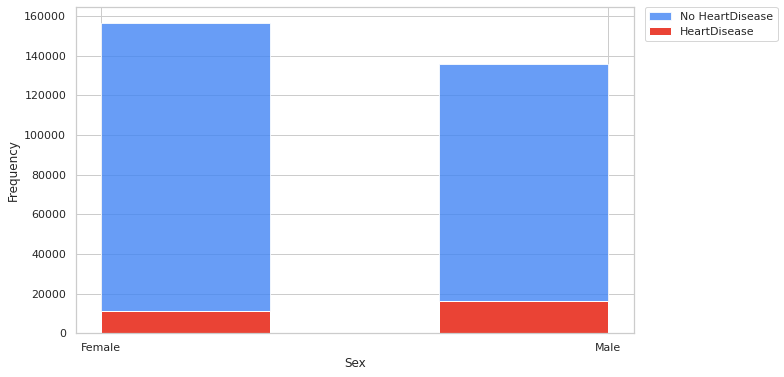

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart_disease[heart_disease["HeartDisease"]=='No']["Sex"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease[heart_disease["HeartDisease"]=='Yes']["Sex"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [ ]:
female_with_heart_disease = len(heart_disease[(heart_disease['HeartDisease']=='Yes') & (heart_disease['Sex']=='Female')])
num_female = len(heart_disease[heart_disease['Sex']=='Female'])
male_with_heart_disease = len(heart_disease[(heart_disease['HeartDisease']=='Yes') & (heart_disease['Sex']=='Male')])
num_male = len(heart_disease[heart_disease['Sex']=='Male'])
print('Probability of Male to have Heart disease:', male_with_heart_disease/num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease/num_female)

Probability of Male to have Heart disease: 0.10618461740904007
Probability of Female to have Heart disease: 0.06694675367241738


# Probability of Male to have Heart disease: 0.10618461740904007
# Probability of Female to have Heart disease: 0.06694675367241738



*   Most heart disease patients are mostly Men


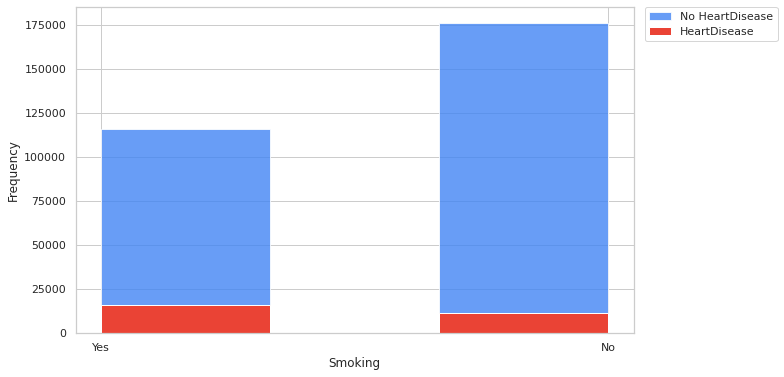

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart_disease[heart_disease["HeartDisease"]=='No']["Smoking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease[heart_disease["HeartDisease"]=='Yes']["Smoking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [ ]:
smoke_and_heart_disease = len(heart_disease[(heart_disease['HeartDisease']=='Yes') & (heart_disease['Smoking']=='Yes')])
num_smoke = len(heart_disease[heart_disease['Smoking']=='Yes'])
no_smoke_and_heart_disease = len(heart_disease[(heart_disease['HeartDisease']=='Yes') & (heart_disease['Smoking']=='No')])
num_no_smoke = len(heart_disease[heart_disease['Smoking']=='No'])
print('Probability of Heart disease if you smoke:', smoke_and_heart_disease/num_smoke)
print("Probability of Heart disease if you don't smoke:", no_smoke_and_heart_disease/num_no_smoke)

Probability of Heart disease if you smoke: 0.12157715983867544
Probability of Heart disease if you don't smoke: 0.0603341370078824


# Probability of Heart disease if you smoke: 0.12157715983867544
# Probability of Heart disease if you don't smoke: 0.0603341370078824




*   Most heart disease patients are smokers



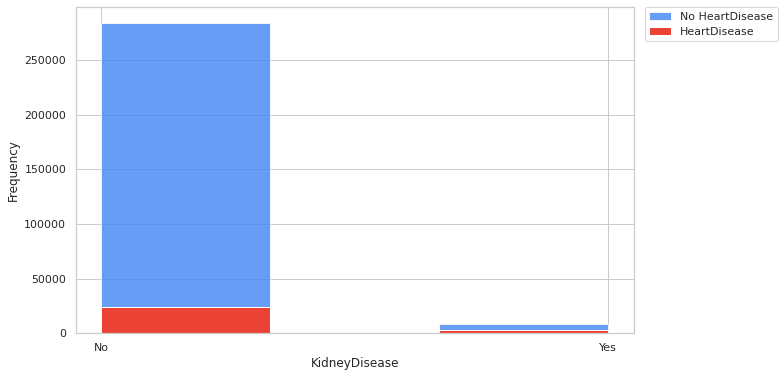

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart_disease[heart_disease["HeartDisease"]=='No']["KidneyDisease"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease[heart_disease["HeartDisease"]=='Yes']["KidneyDisease"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Insights
*   Most Heart Disease Patients have no kidney disease


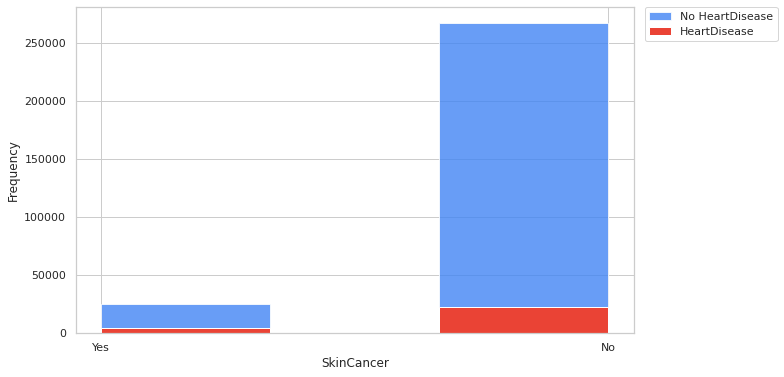

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart_disease[heart_disease["HeartDisease"]=='No']["SkinCancer"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease[heart_disease["HeartDisease"]=='Yes']["SkinCancer"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

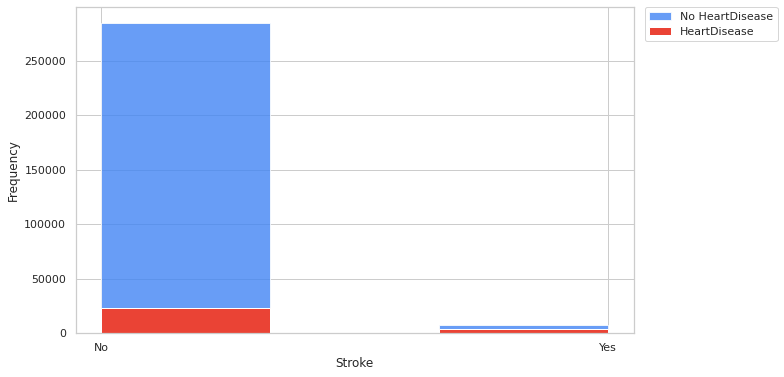

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart_disease[heart_disease["HeartDisease"]=='No']["Stroke"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease[heart_disease["HeartDisease"]=='Yes']["Stroke"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

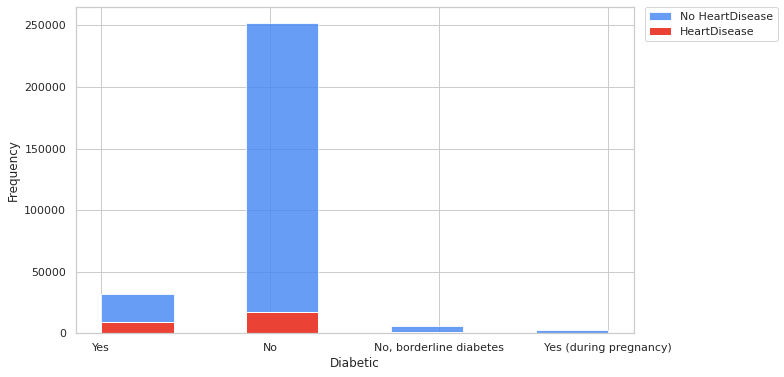

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart_disease[heart_disease["HeartDisease"]=='No']["Diabetic"], bins=7, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease[heart_disease["HeartDisease"]=='Yes']["Diabetic"], bins=7, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

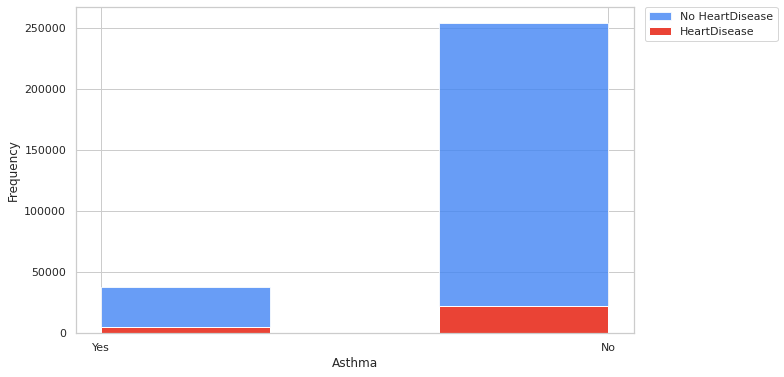

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart_disease[heart_disease["HeartDisease"]=='No']["Asthma"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease[heart_disease["HeartDisease"]=='Yes']["Asthma"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Asthma")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

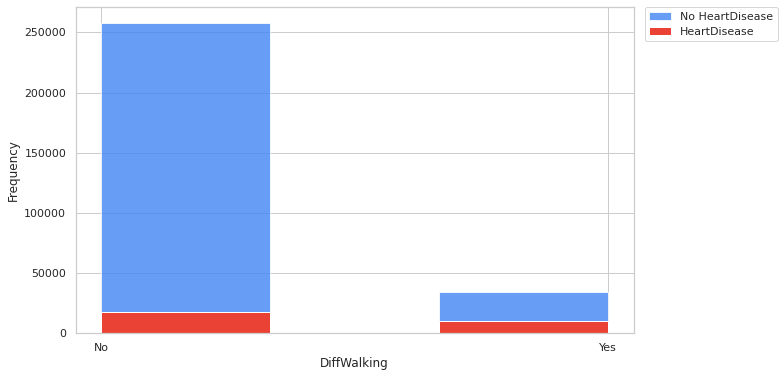

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart_disease[heart_disease["HeartDisease"]=='No']["DiffWalking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease[heart_disease["HeartDisease"]=='Yes']["DiffWalking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("DiffWalking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

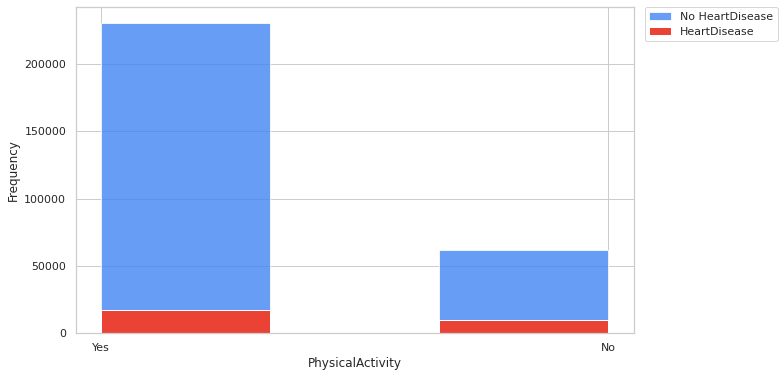

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart_disease[heart_disease["HeartDisease"]=='No']["PhysicalActivity"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease[heart_disease["HeartDisease"]=='Yes']["PhysicalActivity"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("PhysicalActivity")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

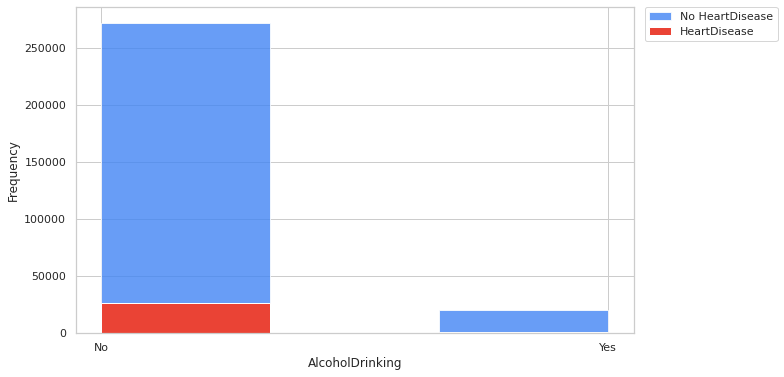

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart_disease[heart_disease["HeartDisease"]=='No']["AlcoholDrinking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease[heart_disease["HeartDisease"]=='Yes']["AlcoholDrinking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("AlcoholDrinking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)